## Carga de Datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)

In [2]:
import sys
from pathlib import Path

# Agregar la carpeta raíz al path para poder importar
carpeta_raiz = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(carpeta_raiz))

# Importar las funciones
from funciones_save_load import guardar_parquet, cargar_parquet

# Usar las funciones
icfes = cargar_parquet("icfes_limpio.parquet")
icfes.sample(6)

,tipo_documento,nacionalidad,genero,pertenece_etnia,estrato_casa,num_personas_casa,cuartos_casa,educacion_padre,educacion_madre,actividad_padre,actividad_madre,internet,tv,computador,lavadora,microndas,carro,moto,consola,num_libros_casa,come_derivados_leche,come_carne_pescado_huevo,come_cereal_frutas_legumbres,situacion_economica,cuanto_lee,cuanto_navega_web,horas_trabajo_semanal,tipo_pago_trabajo,colegio_genero,colegio_oficial,colegio_calendario,colegio_bilingue,tipo_colegio,colegio_sede_principal,colegio_urbano_rural,colegio_jornada,mpio_colegio,dpto_colegio,puntaje_lectura,puntaje_matematicas,puntaje_naturales,puntaje_sociales,puntaje_ingles,puntaje_global,inse_estudiante,nse_estudiantes,nse_colegio,edad
458204,TI,Colombia,Masculino,No,Estrato 3,7 a 8,Cuatro,None,None,Trabajadores operativos,Trabajadores operativos,Si,Si,Si,Si,Si,No,No,Si,0 a 10 libros,3 a 5 veces por semana,Todos o casi todos los días,1 o 2 veces por semana,Igual,No leo por entretenimiento,Entre 1 y 3 horas,Trabajo ocasional,Remuneración monetaria,Mixto,No oficial,A,No,Técnico/académico,Si,Urbano,Completa,Bogotá d.c.,Bogotá,42,50,53,39,55.0,233,53.378294,3.0,3.0,16.0
93400,TI,Colombia,Masculino,Si,Estrato 1,9 o más,Seis o mas,Primaria incompleta,Primaria,Sector primario,Sin actividad remunerada,No,No,No,No,No,No,Si,No,0 a 10 libros,Todos o casi todos los días,1 o 2 veces por semana,Nunca o rara vez comemos eso,Peor,None,Más de 3 horas,Tiempo completo,Remuneración monetaria,Mixto,Oficial,A,No,Técnico/académico,Si,Rural,Unica,Barranco minas,Guainia,38,36,43,37,NaN,192,33.018291,1.0,1.0,19.0
91847,TI,Colombia,Masculino,No,Estrato 2,5 a 6,Tres,None,Primaria,Trabajadores operativos,Trabajadores operativos,Si,Si,Si,Si,No,Si,No,No,11 a 25 libros,Todos o casi todos los días,Todos o casi todos los días,Todos o casi todos los días,Igual,30 minutos o menos,Entre 1 y 3 horas,Trabajo ocasional,Remuneración monetaria,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Mañana,Zipaquirá,Cundinamarca,58,65,59,57,52.0,296,54.855902,3.0,3.0,16.0
169012,TI,Colombia,Masculino,No,Estrato 3,9 o más,Cinco,Primaria incompleta,Primaria incompleta,Microempresario,Sin actividad remunerada,No,No,No,No,No,No,No,No,0 a 10 libros,1 o 2 veces por semana,3 a 5 veces por semana,3 a 5 veces por semana,Igual,30 minutos o menos,30 minutos o menos,Trabajo ocasional,Remuneración monetaria,Mixto,Oficial,A,No,Técnico,Si,Urbano,Completa,Sogamoso,Boyaca,47,52,51,46,39.0,241,36.388416,1.0,2.0,18.0
126950,TI,Colombia,Masculino,No,None,None,None,Profesional,Profesional,None,None,Si,Si,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Mixto,Oficial,A,No,Técnico/académico,Si,Urbano,Mañana,Palmira,Valle,68,55,66,51,52.0,297,NaN,NaN,2.0,17.0
125588,TI,Colombia,Femenino,No,Estrato 2,3 a 4,Tres,Primaria incompleta,Tecnico/Tecnologo incompleta,Sin actividad remunerada,Sin actividad remunerada,No,No,No,No,No,No,No,No,0 a 10 libros,Nunca o rara vez comemos eso,1 o 2 veces por semana,Nunca o rara vez comemos eso,Igual,None,30 minutos o menos,Medio tiempo,Remuneración monetaria,Mixto,Oficial,A,No,Académico,Si,Urbano,Mañana,Magangué,Bolivar,39,23,30,31,31.0,154,33.665033,1.0,2.0,17.0


In [3]:
# Lista explícita de las variables que SÍ son categóricas
columnas_categoricas = [ 'tipo_documento', 'nacionalidad', 'genero', 'pertenece_etnia', 'estrato_casa', 'num_personas_casa', 'cuartos_casa', 
                        'educacion_padre', 'educacion_madre', 'actividad_padre', 'actividad_madre', 'internet', 'tv', 'computador', 'lavadora', 
                        'microndas', 'carro', 'moto', 'consola', 'num_libros_casa', 'come_derivados_leche', 'come_carne_pescado_huevo', 'come_cereal_frutas_legumbres', 
                        'situacion_economica', 'cuanto_lee', 'cuanto_navega_web', 'horas_trabajo_semanal', 'tipo_pago_trabajo', 'colegio_genero', 'colegio_calendario', 
                        'colegio_bilingue', 'tipo_colegio', 'colegio_sede_principal', 'colegio_urbano_rural', 'colegio_jornada', 'mpio_colegio', 'dpto_colegio',
                        'nse_estudiantes', 'nse_colegio'
                        ]

# Solo estas se convierten a category
for col in columnas_categoricas:
    if col in icfes.columns:
        icfes[col] = icfes[col].astype('category')

print("Variables convertidas selectivamente:")
print(icfes.dtypes)

Variables convertidas selectivamente:
tipo_documento                  category
nacionalidad                    category
genero                          category
pertenece_etnia                 category
estrato_casa                    category
num_personas_casa               category
cuartos_casa                    category
educacion_padre                 category
educacion_madre                 category
actividad_padre                 category
actividad_madre                 category
internet                        category
tv                              category
computador                      category
lavadora                        category
microndas                       category
carro                           category
moto                            category
consola                         category
num_libros_casa                 category
come_derivados_leche            category
come_carne_pescado_huevo        category
come_cereal_frutas_legumbres    category
situacion_economica

## 1. Análisis de outliers

### 1.1 Outliers en variable objetivo

In [4]:
y = icfes['puntaje_global']
y_faltantes = y.isna().sum()

if  y_faltantes > 0:
    print(f'La variable objetivo tiene {y_faltantes} valores nulos')
else:
    print('La variable objetivo no tiene valores nulos')

print('-'*60)

print('Las estadísticas descriptivas de la variable objetivo son las siguientes:')
print(f"""
      La media es de: {y.mean().round(2)} puntos
      La mediana es de: {y.median()} puntos
      El valor mínimo es: {y.min()} puntos
      El valor máximo es: {y.max()} puntos
      La desviación estándar es de: {y.std().round(2)} puntos de la media
      La curtosis es de: {y.kurtosis().round(2)}
      """)

# Estudiantes con Cero en el ICFES
cantidad_cero = (icfes['puntaje_global'] == 0).sum()
print(f"Hay {cantidad_cero} estudiantes con puntaje global = 0")

# Estudiantes con 500 en el ICFES
cantidad_500 = (icfes['puntaje_global'] == 500).sum()
print(f"Hay {cantidad_500} estudiantes con puntaje global = 500")

La variable objetivo no tiene valores nulos
------------------------------------------------------------
Las estadísticas descriptivas de la variable objetivo son las siguientes:

      La media es de: 248.35 puntos
      La mediana es de: 245.0 puntos
      El valor mínimo es: 0 puntos
      El valor máximo es: 500 puntos
      La desviación estándar es de: 48.69 puntos de la media
      La curtosis es de: -0.12
      
Hay 80 estudiantes con puntaje global = 0
Hay 2 estudiantes con puntaje global = 500


Número de outliers detectados (|z| > 3): 1587
→ Se considera OUTLIER BAJO si el puntaje es menor a 102.3 puntos
→ Se considera OUTLIER ALTO si el puntaje es mayor a 394.4 puntos


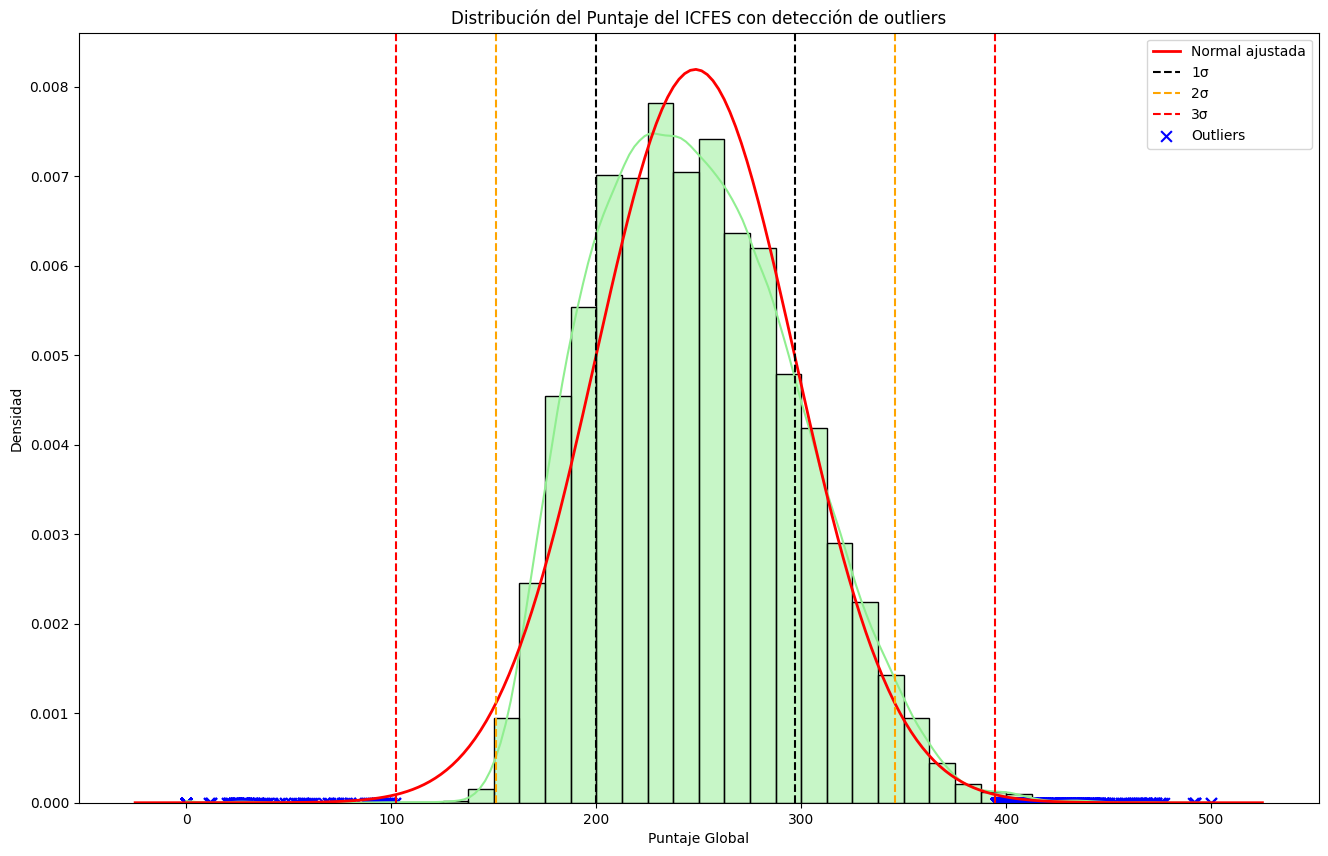

In [5]:
from scipy.stats import norm

# Normalización (Z-score)
mu, sigma = y.mean(), y.std()
z_scores = (y - mu) / sigma

# Índices de los outliers (más allá de 3 desviaciones estándar)
outlier_idx = y.index[abs(z_scores) > 3]

# Crear DataFrame con índice, puntaje y z-score
df_outliers = pd.DataFrame({
    'indice': outlier_idx,
    'puntaje_global': y.loc[outlier_idx],
    'z_score': z_scores.loc[outlier_idx]
}).reset_index(drop=True)

# Ordenar por el valor del z-score
df_outliers = df_outliers.sort_values(by='z_score', ascending=False)

# Umbrales exactos de puntaje para ser considerado outlier
umbral_superior = mu + 3 * sigma
umbral_inferior = mu - 3 * sigma
print(f"Número de outliers detectados (|z| > 3): {len(df_outliers)}")
print(f"→ Se considera OUTLIER BAJO si el puntaje es menor a {umbral_inferior:.1f} puntos")
print(f"→ Se considera OUTLIER ALTO si el puntaje es mayor a {umbral_superior:.1f} puntos")

### Graficamos la distribución del puntaje en valores Z
plt.figure(figsize=(16,10))

# Histograma con KDE
sns.histplot(y, kde=True, stat="density", bins=40, color="lightgreen", edgecolor="black")

# Curva normal teórica
xmin, xmax = plt.xlim()
xx = np.linspace(xmin, xmax, 200)
plt.plot(xx, norm.pdf(xx, mu, sigma), 'r', lw=2, label="Normal ajustada")

# Líneas verticales de 1σ, 2σ, 3σ
for k, col in zip([1,2,3], ["black","orange","red"]):
    plt.axvline(mu + k*sigma, color=col, linestyle="--")
    plt.axvline(mu - k*sigma, color=col, linestyle="--", label=f"{k}σ")
    
# Graficar puntos outliers
plt.scatter(y.loc[outlier_idx], [0]*len(outlier_idx),
            color="blue", marker="x", s=60, label="Outliers")
plt.title("Distribución del Puntaje del ICFES con detección de outliers")
plt.xlabel("Puntaje Global")
plt.ylabel("Densidad")
plt.legend()
plt.show()


Número de outliers detectados (IQR): 1971
→ Se considera OUTLIER BAJO si el puntaje es menor a 104.5 puntos
→ Se considera OUTLIER ALTO si el puntaje es mayor a 388.5 puntos


<Figure size 1400x900 with 0 Axes>

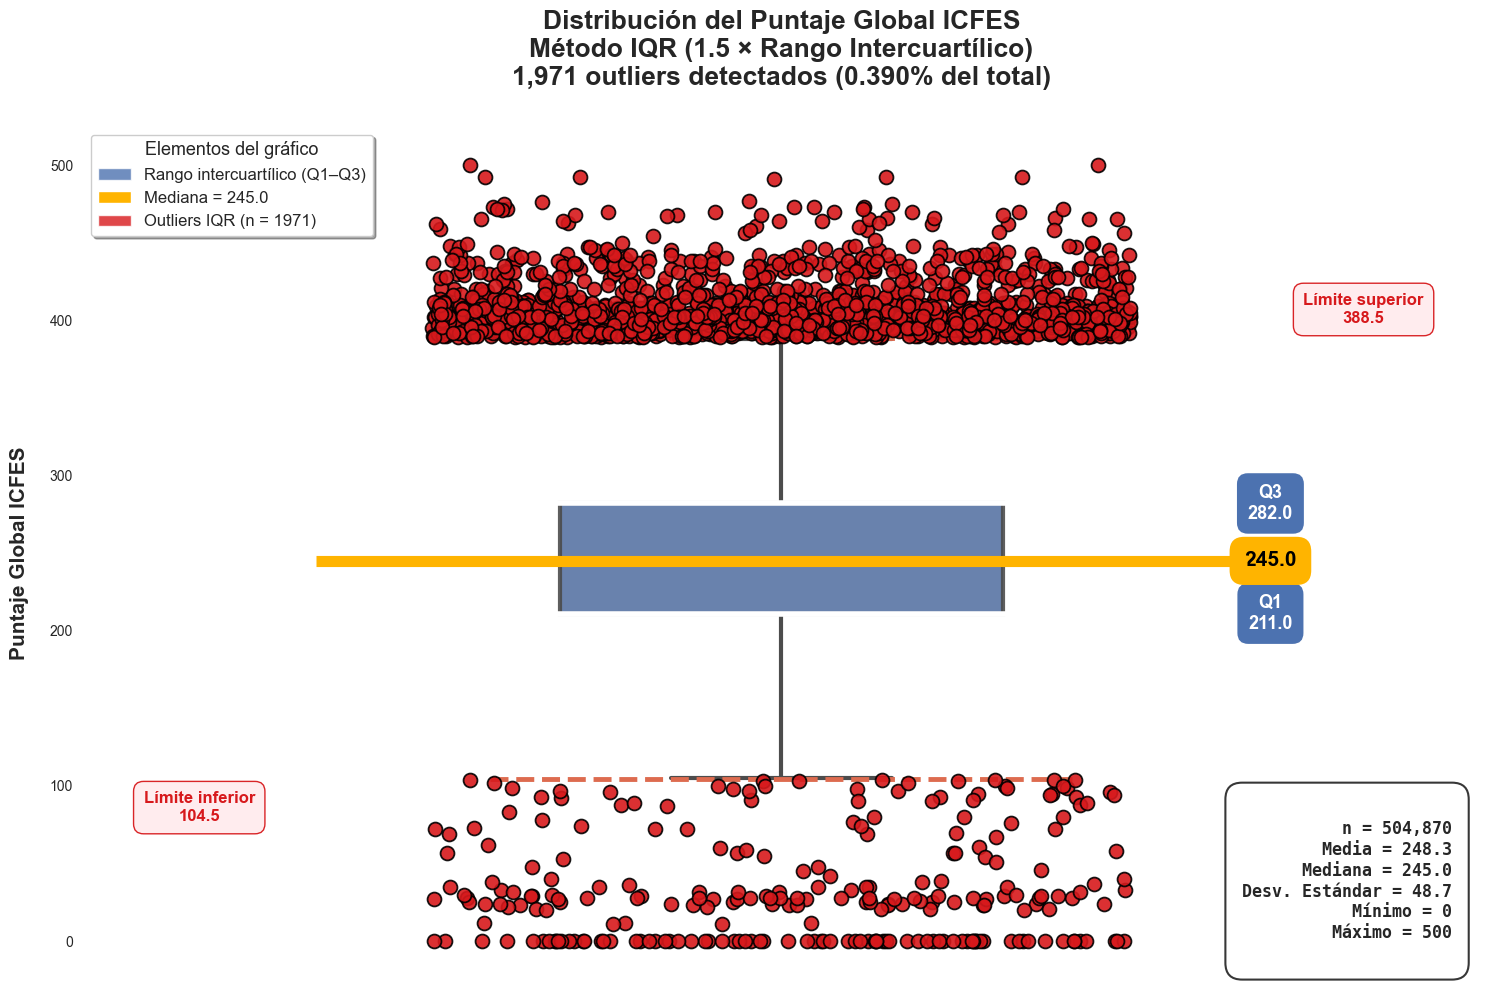

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración estética tipo Nature / Science
plt.figure(figsize=(14, 9))
sns.set_style("white")
sns.set_palette("husl")

# Datos
data = icfes['puntaje_global']

# Calcular IQR y límites
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

# Outliers
outliers = data[(data < lim_inf) | (data > lim_sup)]

print(f"Número de outliers detectados (IQR): {len(outliers)}")
print(f"→ Se considera OUTLIER BAJO si el puntaje es menor a {lim_inf:.1f} puntos")
print(f"→ Se considera OUTLIER ALTO si el puntaje es mayor a {lim_sup:.1f} puntos")


# =============================================
# GRÁFICO FINAL DEFINITIVO - BOXPLOT ICFES
# =============================================
plt.figure(figsize=(15, 10))
sns.set_style("white")

data = icfes['puntaje_global']
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR
outliers = data[(data < lim_inf) | (data > lim_sup)]
mediana = data.median()

# Boxplot principal (sin outliers para control total)
sns.boxplot(y=data, width=0.38, color="#4c72b0", linewidth=3,
            fliersize=0, boxprops=dict(alpha=0.9), medianprops=dict(color="white", linewidth=0))

# Outliers resaltados con stripplot
sns.stripplot(y=outliers, color="#d7191c", size=10, jitter=0.3, alpha=0.9,
              edgecolor="black", linewidth=1.3)

# Bigotes y límites manuales
plt.hlines([Q1, Q3], -0.4, 0.4, color="white", linewidth=4)
plt.hlines([lim_inf, lim_sup], -0.25, 0.25, color="#dd6b4f", linestyle="--", linewidth=3.5)

# Mediana destacada
plt.hlines(mediana, -0.4, 0.4, color="#ffb400", linewidth=8, zorder=10)

# =============================================
# ETIQUETAS CLAVE (posicionadas perfectamente)
# =============================================
plt.text(0.42, Q1, f'Q1\n{Q1:.1f}', fontsize=13, fontweight='bold', color='white',
         ha='center', va='center', bbox=dict(facecolor='#4c72b0', edgecolor='none', boxstyle='round,pad=0.6'))

plt.text(0.42, Q3, f'Q3\n{Q3:.1f}', fontsize=13, fontweight='bold', color='white',
         ha='center', va='center', bbox=dict(facecolor='#4c72b0', edgecolor='none', boxstyle='round,pad=0.6'))

plt.text(0.42, mediana, f'{mediana:.1f}', fontsize=15, fontweight='bold', color='black',
         ha='center', va='center', bbox=dict(facecolor='#ffb400', edgecolor='none', boxstyle='round,pad=0.7'))

# Límites IQR
plt.text(-0.5, lim_inf - 8, f'Límite inferior\n{lim_inf:.1f}', fontsize=12, fontweight='bold',
         color='#d7191c', ha='center', va='top',
         bbox=dict(facecolor='#ffebee', edgecolor='#d7191c', boxstyle='round,pad=0.6', alpha=0.95))

plt.text(0.5, lim_sup + 8, f'Límite superior\n{lim_sup:.1f}', fontsize=12, fontweight='bold',
         color='#d7191c', ha='center', va='bottom',
         bbox=dict(facecolor='#ffebee', edgecolor='#d7191c', boxstyle='round,pad=0.6', alpha=0.95))

# =============================================
# TÍTULO Y ESTADÍSTICAS
# =============================================
plt.title("Distribución del Puntaje Global ICFES\n"
          "Método IQR (1.5 × Rango Intercuartílico)\n"
          f"{len(outliers):,} outliers detectados ({len(outliers)/len(icfes):.3%} del total)",
          fontsize=19, fontweight='bold', pad=30)

# Estadísticas destacadas (caja bonita y visible)
stats_text = f"""
n = {len(icfes):,}
Media = {data.mean():.1f}
Mediana = {mediana:.1f}
Desv. Estándar = {data.std():.1f}
Mínimo = {data.min():.0f}
Máximo = {data.max():.0f}
"""
plt.text(0.98, 0.02, stats_text, transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         verticalalignment='bottom', horizontalalignment='right',
         bbox=dict(facecolor='white', edgecolor='#333333', boxstyle='round,pad=1', linewidth=1.5, alpha=0.98),
         family='monospace')

# =============================================
# LEYENDA Y ESTÉTICA FINAL
# =============================================
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#4c72b0', alpha=0.8, label='Rango intercuartílico (Q1–Q3)'),
    Patch(facecolor='#ffb400', label=f'Mediana = {mediana:.1f}'),
    Patch(facecolor='#d7191c', alpha=0.8, label=f'Outliers IQR (n = {len(outliers)})')
]
plt.legend(handles=legend_elements, title="Elementos del gráfico", title_fontsize=13,
           fontsize=12, loc='upper left', frameon=True, fancybox=True, shadow=True, facecolor='white')

plt.ylabel("Puntaje Global ICFES", fontsize=15, fontweight='bold', labelpad=15)
plt.xlabel("")
plt.xticks([])

sns.despine(left=True, bottom=True)
plt.xlim(-0.6, 0.6)
plt.tight_layout()
plt.show()

Outliers detectados con Isolation Forest: 1900 (0.376%)


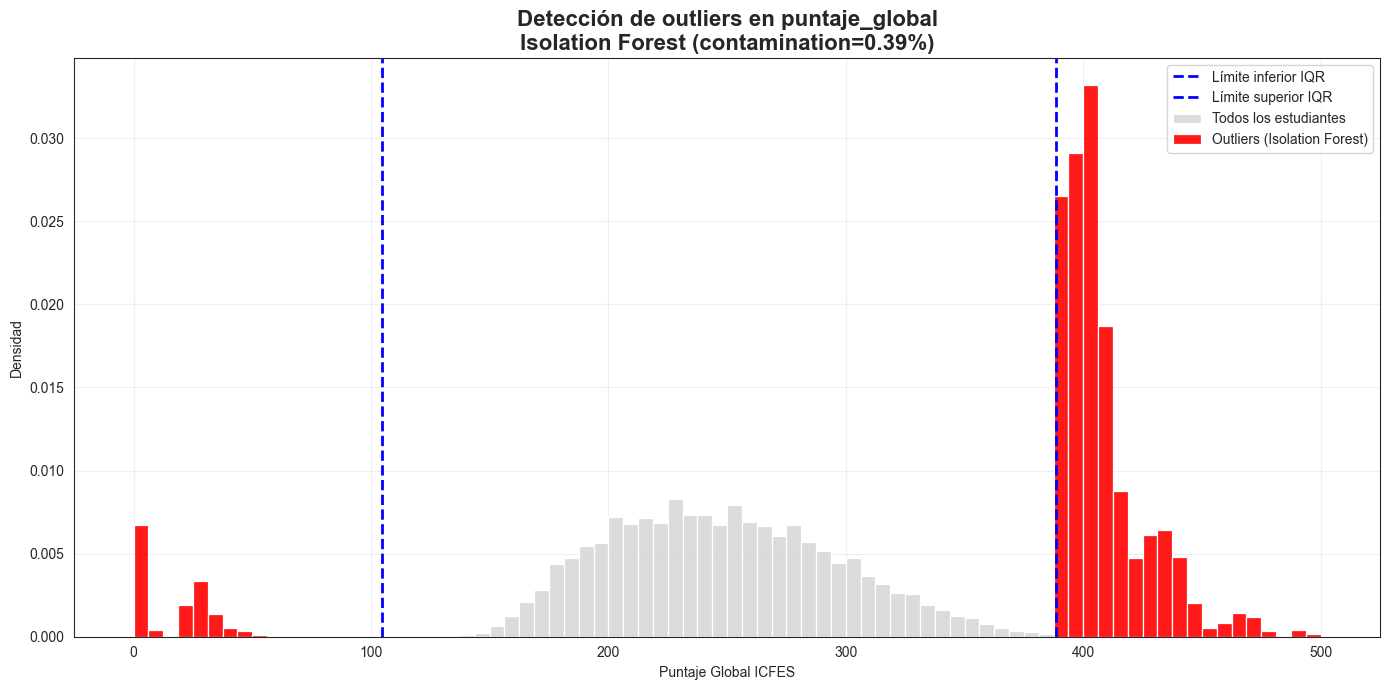

In [7]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------------------------------------
# 1. Isolation Forest
# --------------------------------------------------
X = icfes[['puntaje_global']]

iso = IsolationForest(
    contamination=0.0039,   # ← el 0.39% que dio IQR (el más robusto)
    n_estimators=200,
    random_state=42,
    max_samples='auto'
).fit(X)

# Predicción: -1 = outlier, 1 = normal
icfes['outlier_if'] = iso.predict(X) == -1

print(f"Outliers detectados con Isolation Forest: {icfes['outlier_if'].sum()} "
      f"({icfes['outlier_if'].mean():.3%})")

# --------------------------------------------------
# 2. GRÁFICO
# --------------------------------------------------
plt.figure(figsize=(14, 7))

# Histograma completo
sns.histplot(data=icfes, x='puntaje_global', bins=80, color='lightgray', 
             alpha=0.8, label='Todos los estudiantes', stat='density')

# Outliers en rojo intenso
sns.histplot(data=icfes[icfes['outlier_if']], x='puntaje_global', bins=80,
             color='red', alpha=0.9, label='Outliers (Isolation Forest)', stat='density')

# Líneas verticales de los límites IQR para referencia
plt.axvline(104.5, color='blue', linestyle='--', linewidth=2, label='Límite inferior IQR')
plt.axvline(388.5, color='blue', linestyle='--', linewidth=2, label='Límite superior IQR')

plt.title('Detección de outliers en puntaje_global\nIsolation Forest (contamination=0.39%)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Puntaje Global ICFES')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 1.2 Outliers en otras variables numéricas

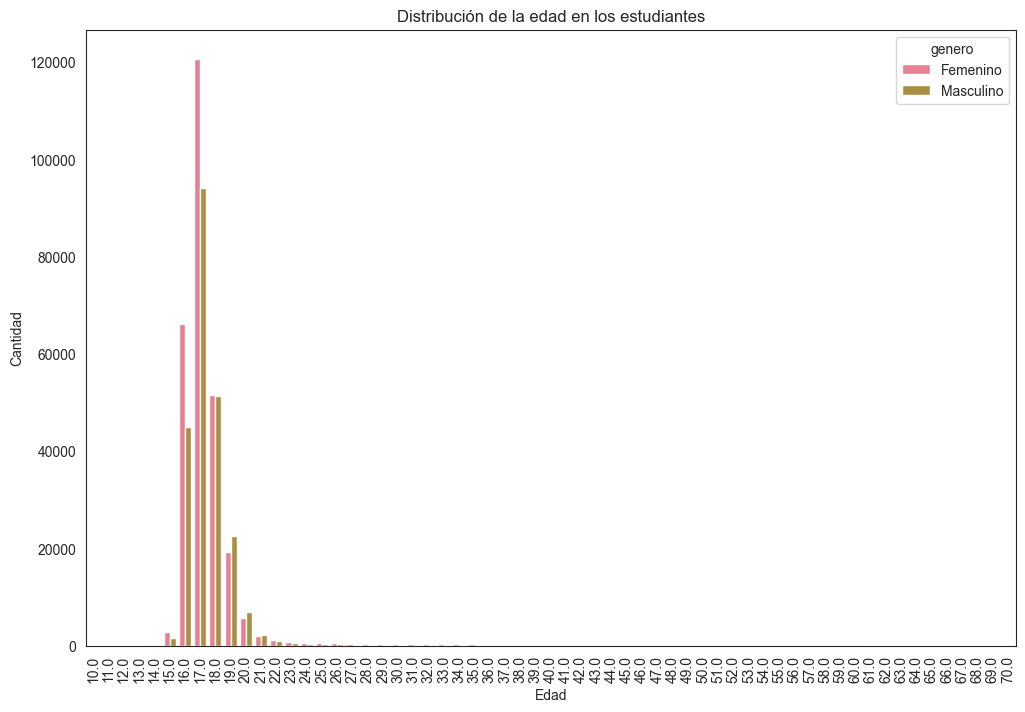

In [8]:
plt.figure(figsize = (12, 8))

sns.countplot(icfes, x = 'edad', hue = 'genero')
plt.title('Distribución de la edad en los estudiantes')
plt.xlabel('Edad')
plt.ylabel('Cantidad')
plt.xticks(rotation = 90)
plt.show()

Se graficarán 8 variables numéricas:
['puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales', 'puntaje_sociales', 'puntaje_ingles', 'puntaje_global', 'inse_estudiante', 'edad']


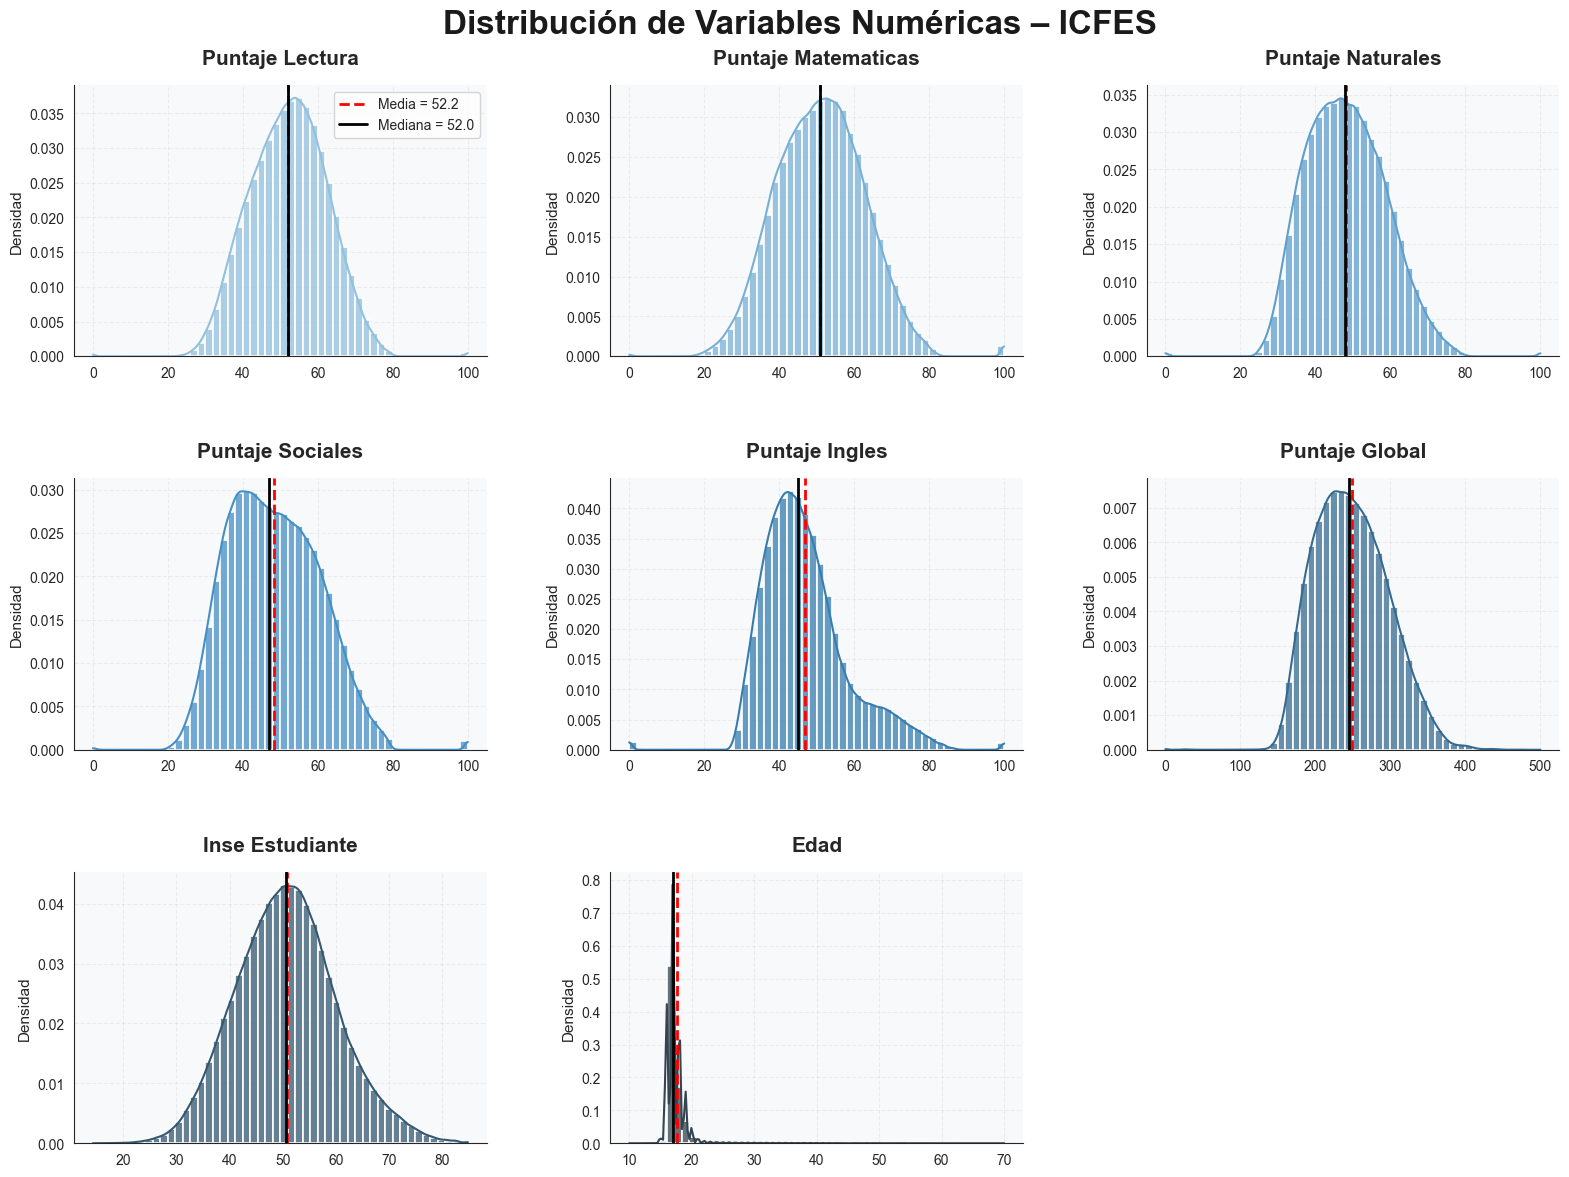

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# =============================================
# DETECTAR VARIABLES NUMÉRICAS
# =============================================
numeric_cols = icfes.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Opcional: excluir variables que no tienen sentido como histograma (ej: IDs, años, etc.)
# numeric_cols = [col for col in numeric_cols if col not in ['id', 'periodo', 'codigo_colegio']]

print(f"Se graficarán {len(numeric_cols)} variables numéricas:")
print(numeric_cols)

# =============================================
# CONFIGURACIÓN DE LA CUADRÍCULA
# =============================================
n_cols = 3                              # número de columnas por fila
n_rows = int(np.ceil(len(numeric_cols) / n_cols))

fig = plt.figure(figsize=(n_cols * 5.5, n_rows * 4.2))
fig.suptitle('Distribución de Variables Numéricas – ICFES', 
             fontsize=24, fontweight='bold', y=0.98, color='#1a1a1a')

# Paleta de colores suave y profesional
colors = sns.color_palette("Blues_d", len(numeric_cols))

# =============================================
# LOOP: UN HISTOGRAMA POR VARIABLE
# =============================================
for idx, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    
    # Histograma + KDE
    sns.histplot(data=icfes, x=col, kde=True,
                 color=colors[idx], alpha=0.75, edgecolor="white", linewidth=1.2,
                 bins=50, stat="density", ax=ax)
    
    # Estadísticas clave en el gráfico
    mean_val = icfes[col].mean()
    median_val = icfes[col].median()
    std_val = icfes[col].std()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Media = {mean_val:.1f}')
    ax.axvline(median_val, color='black', linestyle='-', linewidth=2, label=f'Mediana = {median_val:.1f}')
    
    # Título y etiquetas
    ax.set_title(col.replace('_', ' ').title(), fontsize=15, fontweight='bold', pad=15)
    ax.set_xlabel("")
    ax.set_ylabel("Densidad", fontsize=11)
    
    # Leyenda solo en el primer gráfico
    if idx == 0:
        ax.legend(fontsize=10, loc="upper right")
    else:
        ax.legend().set_visible(False)
    
    # Grid suave
    ax.grid(True, alpha=0.3, linestyle='--')
    ax.set_facecolor('#f8f9fa')

# =============================================
# AJUSTES FINALES
# =============================================
plt.subplots_adjust(left=0.06, right=0.96, top=0.92, bottom=0.08, 
                    wspace=0.3, hspace=0.45)
sns.despine()
plt.show()

Variables numéricas detectadas (8):
['puntaje_lectura', 'puntaje_matematicas', 'puntaje_naturales', 'puntaje_sociales', 'puntaje_ingles', 'puntaje_global', 'inse_estudiante', 'edad']


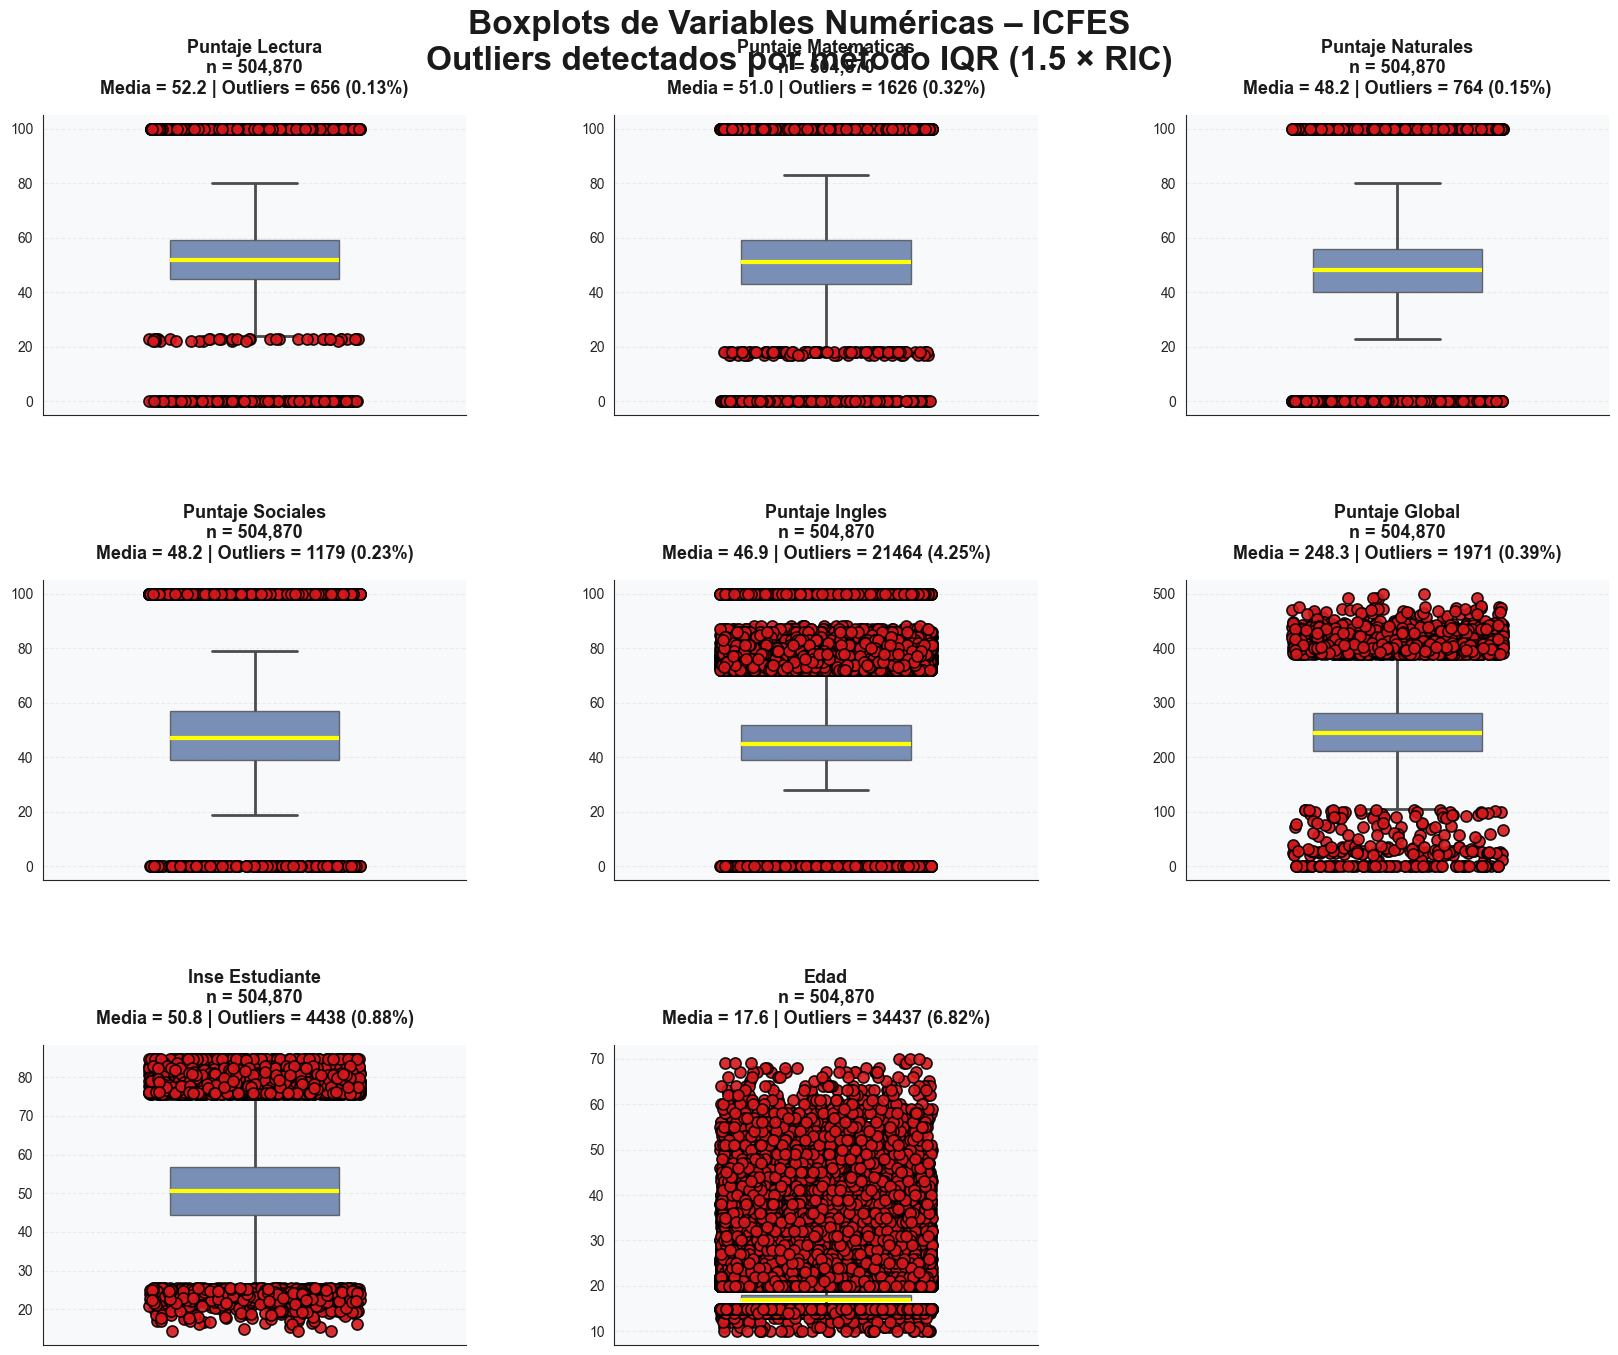

In [10]:

# =============================================
# 1. DETECTAR VARIABLES NUMÉRICAS
# =============================================
numeric_cols = icfes.select_dtypes(include=['int64', 'float64', 'int32', 'float32']).columns.tolist()

# Opcional: excluir columnas que no quieras (ej: ID, periodo, etc.)
# numeric_cols = [col for col in numeric_cols if col not in ['id_estudiante', 'periodo']]

print(f"Variables numéricas detectadas ({len(numeric_cols)}):")
print(numeric_cols)

# =============================================
# 2. CONFIGURACIÓN DE LA CUADRÍCULA
# =============================================
n_cols = 3
n_rows = int(np.ceil(len(numeric_cols) / n_cols))
fig = plt.figure(figsize=(n_cols * 6, n_rows * 5))

fig.suptitle('Boxplots de Variables Numéricas – ICFES\nOutliers detectados por método IQR (1.5 × RIC)', 
             fontsize=24, fontweight='bold', y=0.97, color='#1a1a1a')

# =============================================
# 3. LOOP: UN BOXPLOT POR VARIABLE
# =============================================
for idx, col in enumerate(numeric_cols):
    ax = plt.subplot(n_rows, n_cols, idx + 1)
    
    # Calcular IQR y límites para outliers
    Q1 = icfes[col].quantile(0.25)
    Q3 = icfes[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    outliers = icfes[(icfes[col] < lower_bound) | (icfes[col] > upper_bound)][col]
    
    # Boxplot principal (sin puntos de outliers)
    sns.boxplot(y=icfes[col], ax=ax, color="#4c72b0", width=0.4,
                boxprops=dict(alpha=0.8), medianprops=dict(color="yellow", linewidth=3),
                whiskerprops=dict(linewidth=2), capprops=dict(linewidth=2),
                fliersize=0)  # quitamos los puntos por defecto
    
    # Resaltar outliers en rojo
    if len(outliers) > 0:
        sns.stripplot(y=outliers, ax=ax, color="#d7191c", size=8, jitter=0.25,
                      edgecolor="black", linewidth=1.2, alpha=0.9, zorder=10)

    # Título con estadísticas clave
    mean_val = icfes[col].mean()
    n_out = len(outliers)
    pct_out = n_out / len(icfes) * 100
    
    title = f"{col.replace('_', ' ').title()}\n"
    title += f"n = {len(icfes):,}\n"
    title += f"Media = {mean_val:.1f} | Outliers = {n_out} ({pct_out:.2f}%)"
    
    ax.set_title(title, fontsize=13, fontweight='bold', pad=15, color='#1a1a1a')
    ax.set_ylabel("")
    ax.set_xlabel("")
    
    # Grid suave
    ax.grid(True, axis='y', alpha=0.3, linestyle='--')
    ax.set_facecolor('#f8f9fa')

# =============================================
# 4. AJUSTES FINALES
# =============================================
plt.subplots_adjust(left=0.08, right=0.95, top=0.90, bottom=0.08, 
                    wspace=0.35, hspace=0.55)
sns.despine()
plt.show()

### 1.3 Eliminar outliers de puntaje global en 0

In [11]:
# En puntaje global
n_cero_global = (icfes['puntaje_global'] <= 0).sum()
print(f"Estudiantes con puntaje global 0 o menos: {n_cero_global}")
print(f'Total de filas en el dataset: {icfes.shape[0]}')

Estudiantes con puntaje global 0 o menos: 80
Total de filas en el dataset: 504870


In [12]:
personas_con_cero_global = icfes[icfes['puntaje_global'] <= 0].index

# Elimina permanentemente las filas
icfes.drop(personas_con_cero_global, axis=0, inplace=True)

# Verifica que ya no existen
print("Estudiantes con puntaje_global = 0 después de eliminar:", 
      (icfes['puntaje_global'] <= 0).sum())
print(f'Total de filas en el dataset: {icfes.shape[0]}')

Estudiantes con puntaje_global = 0 después de eliminar: 0
Total de filas en el dataset: 504790


### 1.4 Cuantificación de Outliers

In [18]:
icfes['es_outlier'] = (icfes['puntaje_global'] < 104) | (icfes['puntaje_global'] > 399)
icfes['es_outlier']

0         False
1         False
2         False
3         False
4         False
          ...  
504867    False
504868    False
504869    False
504870    False
504871    False
Name: es_outlier, Length: 504790, dtype: bool